In [1]:
import scipy.io as sio
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

class_a = sio.loadmat('lab2_1.mat')['a']
class_b = sio.loadmat('lab2_1.mat')['b']
class_a_true_mean = 5
class_a_true_std = 1
class_b_true_lambda = 1

Gaussian

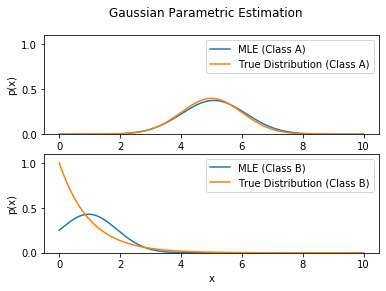

In [2]:
class_a_mle_mean = np.mean(class_a)
class_b_mle_mean = np.mean(class_b)

class_a_mle_variance = np.var(class_a)
class_b_mle_variance = np.var(class_b)

x = np.linspace(0,10,10000)
fig = plt.figure()
fig.suptitle('Gaussian Parametric Estimation')
ax1 = fig.add_subplot(211)    # The big subplot
ax2 = fig.add_subplot(212)

# fig1, ax1 = plt.subplot(2,1,1)
ax1.plot(x, stats.norm.pdf(x, class_a_mle_mean, np.sqrt(class_a_mle_variance)), label='MLE (Class A)')
ax1.plot(x, stats.norm.pdf(x, class_a_true_mean, class_a_true_std), label='True Distribution (Class A)')
ax1.set_ylim([0, 1.1])
ax1.legend()
ax1.set(xlabel="x", ylabel="p(x)")

ax2.plot(x, stats.norm.pdf(x, class_b_mle_mean, np.sqrt(class_b_mle_variance)), label='MLE (Class B)')
ax2.plot(x, stats.expon.pdf(x, loc=0, scale = 1/class_b_true_lambda), label='True Distribution (Class B)')
plt.legend()
ax2.set(xlabel="x", ylabel="p(x)")
ax2.set_ylim([0, 1.1])
ax2.legend()

Exponential

[Text(0, 0.5, 'p(x)'), Text(0.5, 0, 'x')]

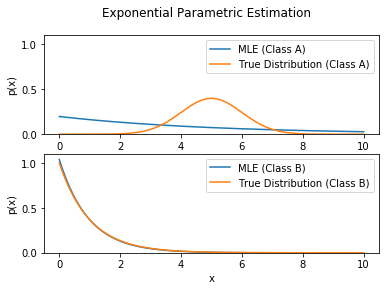

In [3]:
class_a_mle_lambda = 1 / class_a_mle_mean
class_b_mle_lambda = 1 / class_b_mle_mean

x = np.linspace(0,10,10000)

fig = plt.figure()
fig.suptitle('Exponential Parametric Estimation')
ax1 = fig.add_subplot(211)    # The big subplot
ax2 = fig.add_subplot(212)

ax1.plot(x, stats.expon.pdf(x, loc=0, scale = 1/class_a_mle_lambda), label='MLE (Class A)')
ax1.plot(x, stats.norm.pdf(x, class_a_true_mean, class_a_true_std), label='True Distribution (Class A)')
ax1.legend()
ax1.set_ylim([0, 1.1])
ax1.set(xlabel="x", ylabel="p(x)")

ax2.plot(x, stats.expon.pdf(x, loc=0, scale = 1/class_b_mle_lambda), label='MLE (Class B)')
ax2.plot(x, stats.expon.pdf(x, loc=0, scale = 1/class_b_true_lambda), label='True Distribution (Class B)')
ax2.legend()
ax2.set_ylim([0, 1.1])
ax2.set(xlabel="x", ylabel="p(x)")


Uniform

[Text(0, 0.5, 'p(x)'), Text(0.5, 0, 'x')]

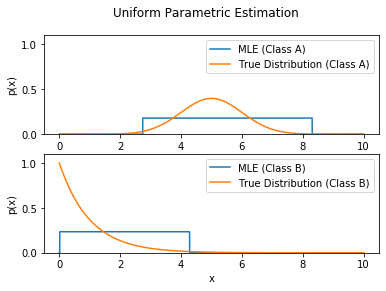

In [9]:
theta_1_a = np.min(class_a)
theta_2_a = np.max(class_a)
class_a_mle_uniform_likelihood = 1 / (theta_2_a - theta_1_a)

theta_1_b = np.min(class_b)
theta_2_b = np.max(class_b)
class_b_mle_uniform_likelihood = 1 / (theta_2_b - theta_1_b)

x = np.linspace(0,10,10000)

fig = plt.figure()
fig.suptitle('Uniform Parametric Estimation')
ax1 = fig.add_subplot(211)    # The big subplot
ax2 = fig.add_subplot(212)

y_a = np.ones(x.shape) 
y_a[:int(theta_1_a / 10 * len(x))] = 0
y_a[int(theta_2_a / 10 * len(x)):] = 0

ax1.plot(x, y_a * class_a_mle_uniform_likelihood, label='MLE (Class A)')
ax1.plot(x, stats.norm.pdf(x, class_a_true_mean, class_a_true_std), label='True Distribution (Class A)')
ax1.legend()
ax1.set_ylim([0, 1.1])
ax1.set(xlabel="x", ylabel="p(x)")

y_b = np.ones(x.shape) 
y_b[:int(theta_1_b / 10 * len(x))] = 0
y_b[int(theta_2_b / 10 * len(x)):] = 0

ax2.plot(x, y_b * class_b_mle_uniform_likelihood, label='MLE (Class B)')
ax2.plot(x, stats.expon.pdf(x, loc=0, scale = 1/class_b_true_lambda), label='True Distribution (Class B)')
ax2.legend()
ax2.set_ylim([0, 1.1])
ax2.set(xlabel="x", ylabel="p(x)")

Non-Parametric

[Text(0, 0.5, 'p(x)'), Text(0.5, 0, 'x')]

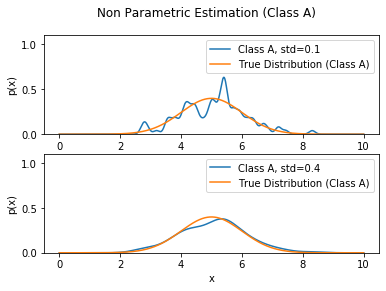

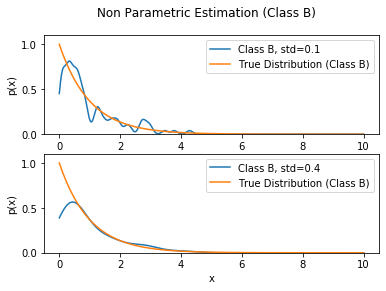

In [5]:
def gaussian_kernel(u):
    return 1/np.sqrt((2*np.pi)) * np.exp(-0.5*np.power(u,2))

window_std_1 = 0.1
window_std_2 = 0.4
prob_a_1 = []
prob_a_2 = []
prob_b_1 = []
prob_b_2 = []
#loop through each x
for index, item in enumerate(x):
    u_a_1 = (item - class_a) / window_std_1
    u_a_2 = (item - class_a) / window_std_2
    u_b_1 = (item - class_b) / window_std_1
    u_b_2 = (item - class_b) / window_std_2
    p = 1/np.size(class_a) * np.sum(1 / window_std_1 * gaussian_kernel(u_a_1))
    prob_a_1.append(p)

    p = 1/np.size(class_a) * np.sum(1 / window_std_2 * gaussian_kernel(u_a_2))
    prob_a_2.append(p)

    p = 1/np.size(class_b) * np.sum(1 / window_std_1 * gaussian_kernel(u_b_1))
    prob_b_1.append(p)

    p = 1/np.size(class_b) * np.sum(1 / window_std_2 * gaussian_kernel(u_b_2))
    prob_b_2.append(p)

fig1 = plt.figure()
fig1.suptitle('Non Parametric Estimation (Class A)')
ax1 = fig1.add_subplot(211)
ax2 = fig1.add_subplot(212)
fig2 = plt.figure()
fig2.suptitle('Non Parametric Estimation (Class B)')
ax3 = fig2.add_subplot(211)
ax4 = fig2.add_subplot(212)

ax1.plot(x,prob_a_1,label='Class A, std=0.1')
ax1.plot(x, stats.norm.pdf(x, class_a_true_mean, class_a_true_std), label='True Distribution (Class A)')
ax1.legend()
ax1.set_ylim([0, 1.1])
ax1.set(xlabel="x", ylabel="p(x)")

ax2.plot(x,prob_a_2,label='Class A, std=0.4')
ax2.plot(x, stats.norm.pdf(x, class_a_true_mean, class_a_true_std), label='True Distribution (Class A)')
ax2.legend()
ax2.set_ylim([0, 1.1])
ax2.set(xlabel="x", ylabel="p(x)")

ax3.plot(x,prob_b_1,label='Class B, std=0.1')
ax3.plot(x, stats.expon.pdf(x, loc=0, scale = 1/class_b_true_lambda), label='True Distribution (Class B)')
ax3.legend()
ax3.set_ylim([0, 1.1])
ax3.set(xlabel="x", ylabel="p(x)")

ax4.plot(x,prob_b_2,label='Class B, std=0.4')
ax4.plot(x, stats.expon.pdf(x, loc=0, scale = 1/class_b_true_lambda), label='True Distribution (Class B)')
ax4.legend()
ax4.set_ylim([0, 1.1])
ax4.set(xlabel="x", ylabel="p(x)")
